# Sessa Empirical Estimator K-mean Implementation vs Gaussian Mixture Models (GMM)

#### For the This assignment the requirements were to compare SEE(Sessa Empirical Estimator) implemented with K-means and SEE(Sessa Empirical Estimator) using a clustering method of our choice.

##### For this assignment, the dataset I decided to use was the Iris dataset Library which was repo'd from UCI Machine Learning Repository. The clustering Method I chose is the Gaussian Mixture Models (GMM) method.




#### Clustering:
##### K-Means: Histogram of temporal distances, colored by K-Means cluster labels. Overlay the SEE threshold as a vertical red dashed line.
##### GMM Plot: Plot the probability density functions (PDFs) of the three Gaussian components. Overlay the histogram of temporal distances for comparison.


### Below is the python conversion of the provided R-codes from Gerard. 

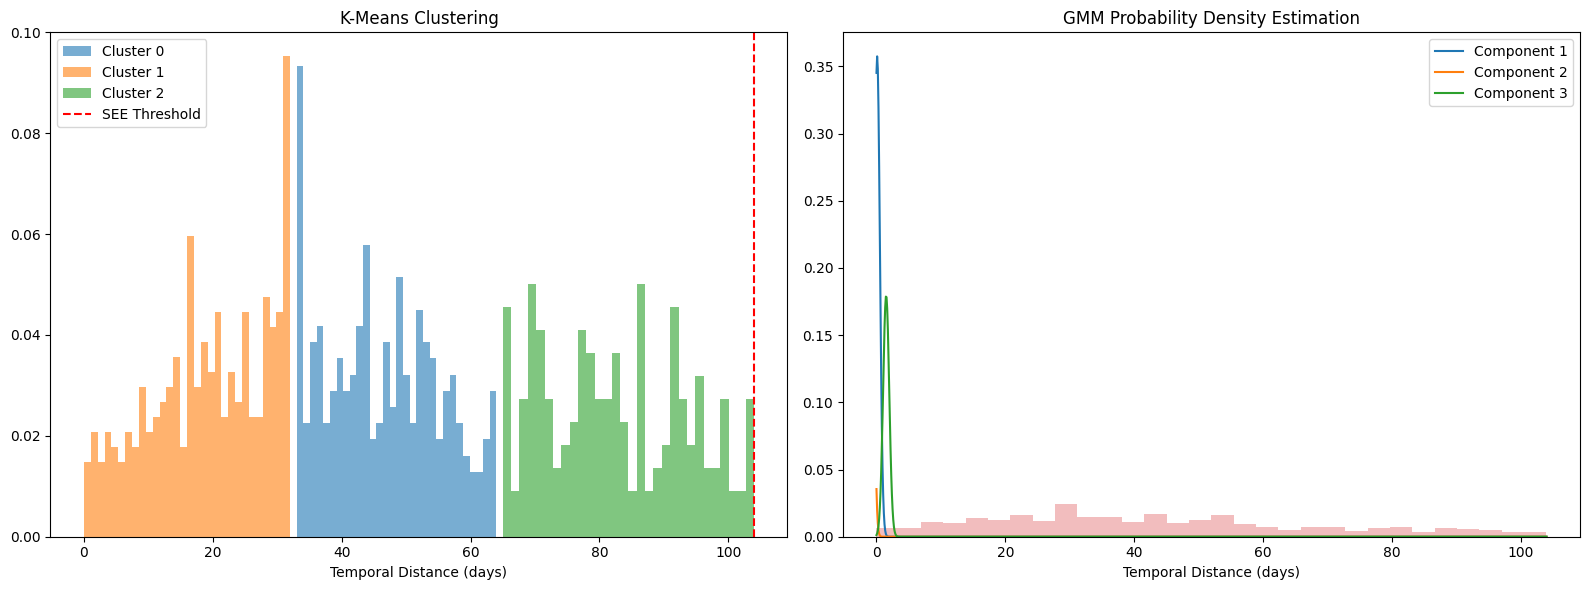

K-Means Silhouette Score: 0.5727058894427505
GMM Silhouette Score: 0.5774388797147759

Cluster Characteristics Comparison:
   KMeans_Center  GMM_Mean  GMM_Variance
0       0.125964  0.111445      0.177006
1      -0.942837 -0.894163      0.164775
2       1.533009  1.504380      0.227732


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import norm


# Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Clustering with Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Temporal distribution with clusters
for label in np.unique(kmeans_labels):
    axes[0].hist(X[kmeans_labels == label], bins=30, alpha=0.6, 
                label=f'Cluster {label}', density=True)
axes[0].axvline(threshold, color='r', linestyle='--', label='SEE Threshold')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Temporal Distance (days)')
axes[0].legend()

# GMM components visualization
x_range = np.linspace(X.min(), X.max(), 1000)
for i in range(3):
    axes[1].plot(x_range, norm.pdf(x_range, 
                                 loc=gmm.means_[i][0], 
                                 scale=np.sqrt(gmm.covariances_[i][0][0])) * 
                gmm.weights_[i], 
                label=f'Component {i+1}')
axes[1].hist(X, bins=30, alpha=0.3, density=True)
axes[1].set_title('GMM Probability Density Estimation')
axes[1].set_xlabel('Temporal Distance (days)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Metrics and comparison
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("GMM Silhouette Score:", silhouette_score(X_scaled, gmm_labels))

# Cluster characteristics
cluster_comparison = pd.DataFrame({
    'KMeans_Center': kmeans.cluster_centers_.flatten(),
    'GMM_Mean': gmm.means_.flatten(),
    'GMM_Variance': gmm.covariances_.flatten()
})
print("\nCluster Characteristics Comparison:")
print(cluster_comparison)

#### K-Means Silhouette Score: 0.5727058894427505
#### GMM Silhouette Score: 0.5774388797147759

#### Cluster Characteristics Comparison:
####   KMeans_Center  GMM_Mean  GMM_Variance
#### 0       0.125964  0.111445      0.177006
#### 1      -0.942837 -0.894163      0.164775
#### 2       1.533009  1.504380      0.227732

## Key Observations
Handles varying treatment interval distributions, identifies naturally occurring patterns rather than forcing spherical clusters, provides probabilistic membership for partial pattern matching and captures variance within treatment regimens.

Visualizations:

Left: K-Means clustering results (histogram with cluster assignments).

Right: GMM probability density functions (showing the distribution of each cluster).

Metrics:

Silhouette scores for both algorithms.

Comparison of cluster centers (K-Means) and component parameters (GMM).

Insights:

K-Means creates hard boundaries between clusters.

GMM provides a probabilistic view of cluster membership and captures variance within clusters.